In [1]:
import random
import numpy as np
import torch
import matplotlib.pyplot as plt 

# add this because both pytorch and matplotlib both use OpenMP
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [355]:
sample_size = 1000
network_size = 5
advertiser_size = 5

values = torch.FloatTensor(sample_size, network_size, advertiser_size).uniform_(1, 100)
bids = 0.8 * values

In [371]:
alpha = 0.3
beta = 0.5

k = [2,2,2,2,2]

In [372]:
networks_payoff = [[] for _ in range(network_size)] 
publisher_payoff = []
same_network_first_and_second_label = []
network_winner = []

for sample in range(sample_size):
    
    bid_candidates = [] # collect k highest bidders from each network
    top_k_indices = [] # remember top k bidders indices in each network
    
    for i in range(network_size):
        
        top_k = torch.topk(values[sample][i], k[i]) 
        
        bid_candidates.append(top_k[0])
        top_k_indices.append(top_k[1])
        
    bid_candidates = torch.cat(bid_candidates, dim=0)
    
    # global first, second, and third highest bid
    top_bids = torch.topk(bid_candidates, 3)
    first_bid = top_bids[0][0].tolist()
    second_bid = top_bids[0][1].tolist()
    third_bid = top_bids[0][2].tolist()
    first_idx = top_bids[1][0].tolist() # index in top_bids, not actual index in original network list
    second_idx = top_bids[1][1].tolist()
    third_idx = top_bids[1][2].tolist()
    
    # what networks are top three comes from
    temp = first_idx+1
    for idx, x in enumerate(k):
        temp = temp - x
        if temp <= 0:
            first_network = idx
            break
    temp = second_idx+1
    for idx, x in enumerate(k):
        temp = temp - x
        if temp <= 0:
            second_network = idx
            break
    temp = third_idx+1
    for idx, x in enumerate(k):
        temp = temp - x
        if temp <= 0:
            third_network = idx
            break
        
    # calculate network payoffs
    for i in range(network_size):
        if i == first_network:
            value_winner = values[sample][i][top_k_indices[i][0].tolist()].tolist()
            if i == second_network:
                networks_payoff[i].append(alpha * (second_bid - third_bid) + beta * (value_winner - second_bid))
            else:
                networks_payoff[i].append(beta * (value_winner - second_bid))
        else:
            networks_payoff[i].append(0)
            
    # calculate publisher payoff
    if first_network == second_network:
        publisher_payoff.append(third_bid + (1 - alpha) * (second_bid - third_bid))
    else:
        publisher_payoff.append(second_bid)
                          
    # collect for data analysis
    for i in range(network_size):
        if i == first_network:
            network_winner.append(i)
        
    if first_network == second_network:
        same_network_first_and_second_label.append(True)   
    else:
        same_network_first_and_second_label.append(False) 

In [286]:
networks_payoff2 = networks_payoff[:]

In [373]:
publisher_payoff6 = publisher_payoff[:]

In [376]:
idx = np.where(np.array(same_network_first_and_second_label))[0].tolist()
#idx = np.intersect1d(np.where(np.array(network_winner) == 0), np.where(np.array(same_network_first_and_second_label)))
publisher_payoff11 = [publisher_payoff1[i] for i in idx]
publisher_payoff22 = [publisher_payoff2[i] for i in idx]
publisher_payoff33 = [publisher_payoff3[i] for i in idx]
publisher_payoff44 = [publisher_payoff4[i] for i in idx]
publisher_payoff55 = [publisher_payoff5[i] for i in idx]
publisher_payoff66 = [publisher_payoff6[i] for i in idx]

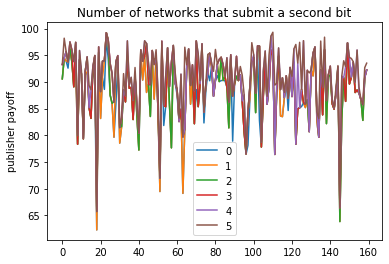

In [391]:
plt.title('Number of networks that submit a second bit')
plt.plot(publisher_payoff11, label='0')
plt.plot(publisher_payoff22, label='1')
plt.plot(publisher_payoff33, label='2')
plt.plot(publisher_payoff44, label='3')
plt.plot(publisher_payoff55, label='4')
plt.plot(publisher_payoff66, label='5')
plt.ylabel('publisher payoff')
plt.legend()
plt.savefig('foo.png', bbox_inches='tight', dpi=300)

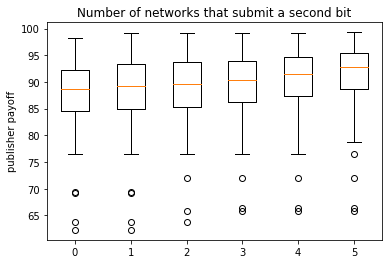

In [393]:
plt.title('Number of networks that submit a second bit')
plt.ylabel('publisher payoff')
plt.boxplot([publisher_payoff11, publisher_payoff22, publisher_payoff33, publisher_payoff44, publisher_payoff55, publisher_payoff66])
plt.xticks(range(1,7), range(6))
plt.savefig('foo.png', bbox_inches='tight', dpi=300)

In [76]:
k = 2

networks_payoff2 = [[] for _ in range(network_size)] 
publisher_payoff2 = []
same_network_first_and_second_label2 = []
network_winner = []

for sample in range(sample_size):
    
    bid_candidates = [] # collect k highest bidders from each network
    top_k_indices = [] # remember top k bidders indices in each network
    
    for i in range(network_size):
        
        top_k = torch.topk(values[sample][i], k) 
        
        bid_candidates.append(top_k[0])
        top_k_indices.append(top_k[1])
        
    bid_candidates = torch.cat(bid_candidates, dim=0)
    
    # global first, second, and third highest bid
    top_bids = torch.topk(bid_candidates, 3)
    first_bid = top_bids[0][0].tolist()
    second_bid = top_bids[0][1].tolist()
    third_bid = top_bids[0][2].tolist()
    first_idx = top_bids[1][0].tolist() # index in top_bids, not actual index in original network list
    second_idx = top_bids[1][1].tolist()
    third_idx = top_bids[1][2].tolist()
    
    # what networks are top three comes from
    first_network = first_idx//k
    second_network = second_idx//k
    third_network = third_idx//k
    
    # calculate network payoffs
    for i in range(network_size):
        if i == first_network:
            value_winner = values[sample][i][top_k_indices[i][0].tolist()].tolist()
            if i == second_network:
                
                networks_payoff2[i].append(alpha * (second_bid - third_bid) + beta * (value_winner - second_bid))
            else:
                networks_payoff2[i].append(beta * (value_winner - second_bid))
        else:
            networks_payoff2[i].append(0)
            
    # calculate publisher payoff
    if first_network == second_network:
        publisher_payoff2.append(third_bid + (1 - alpha) * (second_bid - third_bid))
    else:
        publisher_payoff2.append(second_bid)
                          
    # collect for data analysis
    for i in range(network_size):
        if i == first_network:
            network_winner.append(i)
        
    if first_network == second_network:
        same_network_first_and_second_label2.append(True)   
    else:
        same_network_first_and_second_label2.append(False) 

In [91]:
idx = np.intersect1d(np.where(np.array(network_winner) == 0), np.where(np.array(same_network_first_and_second_label2)))
data11 = [networks_payoff[0][i] for i in idx]
data22 = [networks_payoff2[0][i] for i in idx]

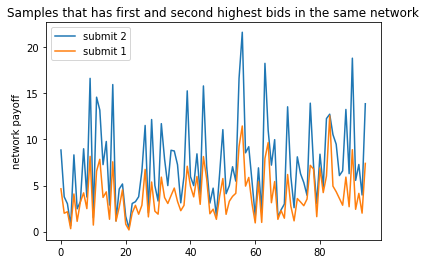

In [100]:
plt.title('Samples that has first and second highest bids in the same network')
plt.plot(data22, label='submit 2')
plt.plot(data11, label='submit 1')
plt.ylabel('network payoff')
plt.legend()
plt.savefig('foo.png', bbox_inches='tight', dpi=300)